In [1]:
import zipfile
local_zip = '/content/emotion_classify_data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import os
os.listdir()

['.config',
 'Emotion_classify_Data.csv',
 'emotion_classify_data.zip',
 'sample_data']

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Emotion_classify_Data.csv")
df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [4]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [5]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download("stopwords")

def preprocess_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\W+|\d+', ' ', text)
    word_tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in word_tokens if not w.lower() in stop_words]
    return " ".join(filtered_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df.Comment = df.Comment.apply(preprocess_text)
df

,Comment,Emotion
0,seriously hate one subject death feel reluctan...,fear
1,im full life feel appalled,anger
2,sit write start dig feelings think afraid acce...,fear
3,ive really angry r feel like idiot trusting fi...,joy
4,feel suspicious one outside like rapture happe...,fear
...,...,...
5932,begun feel distressed,fear
5933,left feeling annoyed angry thinking center stu...,anger
5934,ever get married everything ready offer got to...,joy
5935,feel reluctant applying want able find company...,fear


In [7]:
df.duplicated().sum()

30

In [8]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [9]:
df

,Comment,Emotion
0,seriously hate one subject death feel reluctan...,fear
1,im full life feel appalled,anger
2,sit write start dig feelings think afraid acce...,fear
3,ive really angry r feel like idiot trusting fi...,joy
4,feel suspicious one outside like rapture happe...,fear
...,...,...
5902,begun feel distressed,fear
5903,left feeling annoyed angry thinking center stu...,anger
5904,ever get married everything ready offer got to...,joy
5905,feel reluctant applying want able find company...,fear


In [10]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.20, random_state=0)

In [11]:
df_train.Emotion.value_counts()

joy      1610
anger    1584
fear     1531
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion'>

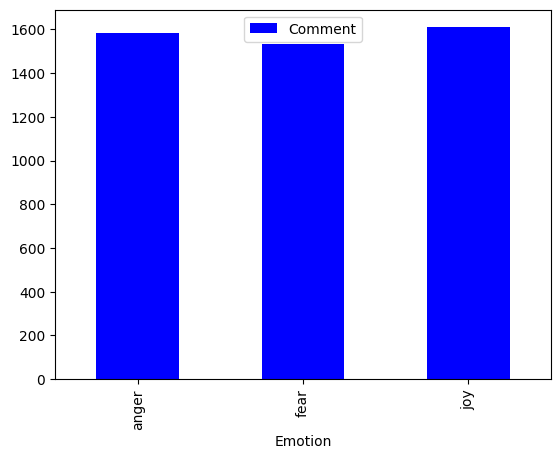

In [12]:
import matplotlib.pyplot as plt

df_train.groupby('Emotion').count().plot.bar(color='blue')

In [13]:
df_test.Emotion.value_counts()

anger    401
fear     396
joy      385
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion'>

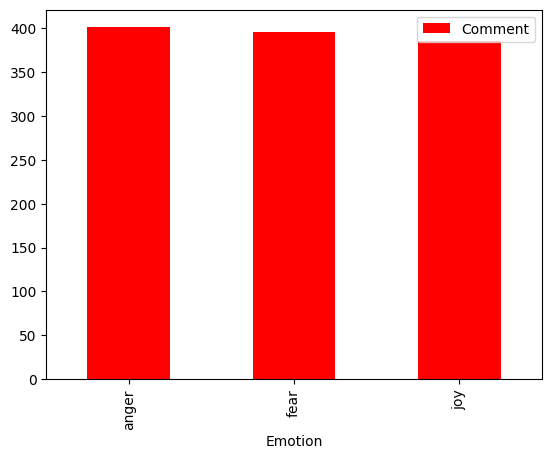

In [14]:
df_test.groupby('Emotion').count().plot.bar(color='red')

In [15]:
category_train = pd.get_dummies(df_train.Emotion)
df_train_baru = pd.concat([df_train, category_train], axis=1)
df_train_baru = df_train_baru.drop(columns='Emotion')
df_train_baru

,Comment,anger,fear,joy
5691,im feeling absolutely terrified pain trauma al...,0,1,0
841,came quarter feeling really invigorated work i...,0,0,1
1830,every right feel outraged legacy may danger,1,0,0
3448,feel particularly mad course say going crazy r...,1,0,0
5458,feeling also blossoming eager anxiety,0,0,1
...,...,...,...,...
4931,men zhu said snapbacks cheap also feel dangero...,1,0,0
3264,would feel pissed,1,0,0
1653,ive feeling far perfect area motherhood,0,0,1
2607,didnt feel like really got know feel im unsure...,0,1,0


In [16]:
content_latih = df_train_baru['Comment'].values
label_latih = df_train_baru[['anger', 'fear', 'joy']].values

In [17]:
category_test = pd.get_dummies(df_test.Emotion)
df_test_baru = pd.concat([df_test, category_test], axis=1)
df_test_baru = df_test_baru.drop(columns='Emotion')
df_test_baru

,Comment,anger,fear,joy
4321,feel distressed supportive campaign senator,0,1,0
394,feeling quite pleased something id never done,0,0,1
3658,mind feel like mind dangerous life,1,0,0
1034,hate feeling like im always getting mad reason...,1,0,0
2189,feel tortured sense wrong,0,1,0
...,...,...,...,...
453,feel really irritable everything drives insane,1,0,0
4202,write moment feel cold chill,1,0,0
4893,feel strange bonding bed wardrode using little...,0,1,0
3119,feel fine pretty rough running hours minutes s...,0,0,1


In [18]:
content_test = df_test_baru['Comment'].values
label_test = df_test_baru[['anger', 'fear', 'joy']].values

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_tokens = 45

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(content_latih)

sekuens_latih = tokenizer.texts_to_sequences(content_latih)
sekuens_test = tokenizer.texts_to_sequences(content_test)

padded_latih = pad_sequences(sekuens_latih,
                             padding='post',
                             maxlen=max_tokens,
                             truncating='post')
padded_test = pad_sequences(sekuens_test,
                            padding='post',
                            maxlen=max_tokens,
                            truncating='post')

In [20]:
print(tokenizer.word_index)

{'x': 1865, 'feel': 2, 'feeling': 3, 'like': 4, 'im': 5, 'little': 6, 'really': 7, 'know': 8, 'time': 9, 'people': 10, 'get': 11, 'want': 12, 'would': 13, 'bit': 14, 'even': 15, 'think': 16, 'way': 17, 'still': 18, 'going': 19, 'one': 20, 'ive': 21, 'could': 22, 'make': 23, 'dont': 24, 'something': 25, 'things': 26, 'life': 27, 'much': 28, 'day': 29, 'go': 30, 'back': 31, 'need': 32, 'around': 33, 'love': 34, 'right': 35, 'also': 36, 'see': 37, 'good': 38, 'pretty': 39, 'work': 40, 'say': 41, 'feels': 42, 'feelings': 43, 'cant': 44, 'always': 45, 'today': 46, 'felt': 47, 'less': 48, 'someone': 49, 'well': 50, 'agitated': 51, 'got': 52, 'didnt': 53, 'help': 54, 'makes': 55, 'though': 56, 'made': 57, 'happy': 58, 'angry': 59, 'sure': 60, 'enough': 61, 'anxious': 62, 'lot': 63, 'left': 64, 'away': 65, 'never': 66, 'ever': 67, 'actually': 68, 'quite': 69, 'every': 70, 'without': 71, 'strange': 72, 'getting': 73, 'everything': 74, 'kind': 75, 'afraid': 76, 'days': 77, 'anything': 78, 'come'

In [21]:
print(padded_latih[:4])

[[   5    3  320   97  302 1684  109 3356  248    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [ 338 1685    3    7  479   40    5   31  206 1416 1685  924  544   50
   280  273   38   40    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [  70   35    2  435 3357   89 1686    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   2  281  138  545   41   19  758    7    2    4 1417 3358    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]]


In [22]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16, input_length=max_tokens),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 45, 16)            80000     
                                                                 
 dropout (Dropout)           (None, 45, 16)            0         
                                                                 
 lstm (LSTM)                 (None, 16)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 3)                 51        
                                                                 
Total params: 82163 (320.95 KB)
Trainable params: 82163 (320.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
class ModelCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.91 and logs.get('val_accuracy') > 0.91:
            self.model.stop_training = True

In [24]:
stop_callback = ModelCallback()
num_epochs = 250

history = model.fit(
    padded_latih,
    label_latih,
    epochs=num_epochs,
    validation_data=(padded_test, label_test),
    verbose=2,
    callbacks=stop_callback)

Epoch 1/250
148/148 - 13s - loss: 1.0995 - accuracy: 0.3414 - val_loss: 1.0995 - val_accuracy: 0.3257 - 13s/epoch - 88ms/step
Epoch 2/250
148/148 - 5s - loss: 1.0988 - accuracy: 0.3376 - val_loss: 1.0988 - val_accuracy: 0.3257 - 5s/epoch - 32ms/step
Epoch 3/250
148/148 - 3s - loss: 1.0992 - accuracy: 0.3335 - val_loss: 1.0993 - val_accuracy: 0.3257 - 3s/epoch - 23ms/step
Epoch 4/250
148/148 - 3s - loss: 1.0985 - accuracy: 0.3446 - val_loss: 1.0995 - val_accuracy: 0.3257 - 3s/epoch - 23ms/step
Epoch 5/250
148/148 - 3s - loss: 1.0989 - accuracy: 0.3350 - val_loss: 1.0992 - val_accuracy: 0.3257 - 3s/epoch - 20ms/step
Epoch 6/250
148/148 - 3s - loss: 1.0989 - accuracy: 0.3374 - val_loss: 1.0992 - val_accuracy: 0.3257 - 3s/epoch - 19ms/step
Epoch 7/250
148/148 - 3s - loss: 1.0987 - accuracy: 0.3403 - val_loss: 1.0990 - val_accuracy: 0.3257 - 3s/epoch - 21ms/step
Epoch 8/250
148/148 - 4s - loss: 1.0987 - accuracy: 0.3433 - val_loss: 1.0988 - val_accuracy: 0.3393 - 4s/epoch - 26ms/step
Epoch 

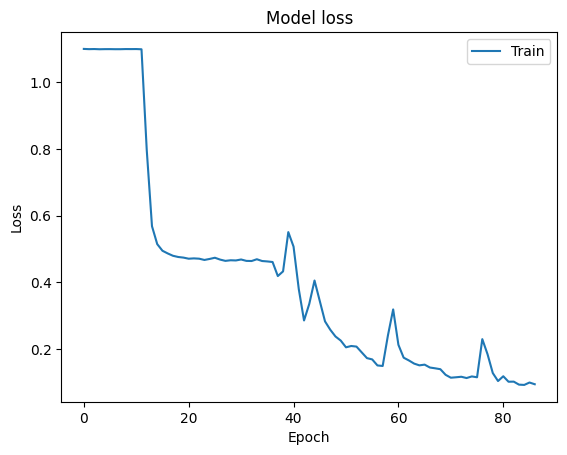

In [25]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

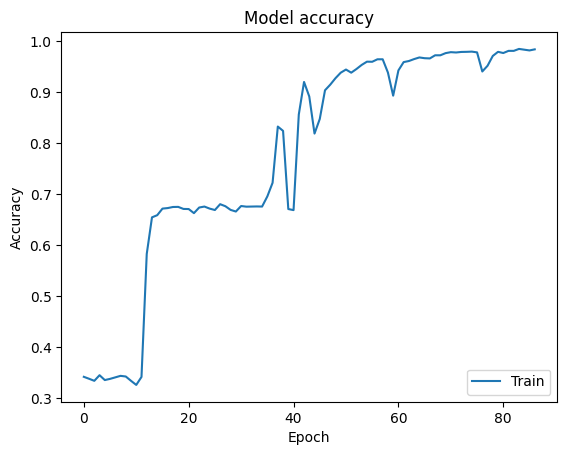

In [26]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

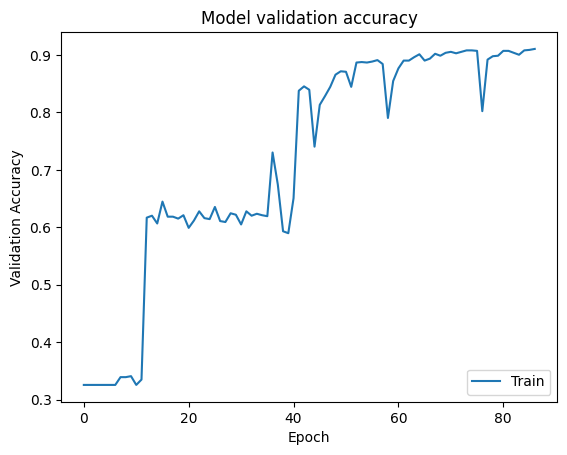

In [27]:
plt.plot(history.history['val_accuracy'])
plt.title('Model validation accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()